<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/Kaggle_Fraud_Detection_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Kaggle 신용카드 사기 검출(Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud

#### Credit Card Fraud Detection
* creditcard.csv(284,807 * 31)
* Class : 0(정상), 1(사기)
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

## 1.Google Drive Mount

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


## 2.Data Preprocessing

In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


In [6]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar 18 04:10 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


In [7]:
%%time

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#0 : 정상, 1 : 사기

DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
(DF.Class.value_counts() / DF.shape[0] * 100)

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [11]:
#time 열 삭제
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [16]:
#데이터프레임 Array형태로 바꾼 후 열 나누기
AR = DF.values

AR_X = AR[:, 0:29]
AR_y = AR[:,29]

AR_X.shape, AR_y.shape

((284807, 29), (284807,))

In [17]:
AR

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [18]:
AR_X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [19]:
AR_y

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
# class 인코딩(원핫인코딩)

AR_yOHE = tf.keras.utils.to_categorical(AR_y)

AR_yOHE

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## 3.Keras Modeling

In [24]:
#Data Split
X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 29), (85443, 29), (199364, 2), (85443, 2))

In [94]:
#Define : 모델 신경망 구조 정의

Model_FD = models.Sequential()

Model_FD.add(layers.Dense(128, activation = 'relu', input_shape = (29,)))
Model_FD.add(layers.Dense(32, activation = 'relu'))
Model_FD.add(layers.Dense(16, activation = 'relu'))
Model_FD.add(layers.Dense(2, activation = 'sigmoid')) # 이진분류

In [95]:
#확인
Model_FD.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_28 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 34        
Total params: 8,530
Trainable params: 8,530
Non-trainable params: 0
_________________________________________________________________


In [96]:
#Compile : 학습방법 설정
Model_FD.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = ['Recall'])

In [97]:
#Fit : 모델 학습 수행
History_FD = Model_FD.fit(X_train, y_train,
                          epochs = 40, #빠른 테스트를 위해 횟수는 적게 잡았다
                          batch_size = 1024,
                          validation_data = (X_test, y_test))

Epoch 1/40
195/195 [==============================] - 2s 6ms/step - loss: 0.1600 - recall: 0.9536 - val_loss: 0.0069 - val_recall: 0.9993
Epoch 2/40
195/195 [==============================] - 1s 5ms/step - loss: 0.0059 - recall: 0.9993 - val_loss: 0.0170 - val_recall: 0.9993
Epoch 3/40
195/195 [==============================] - 1s 5ms/step - loss: 0.0049 - recall: 0.9993 - val_loss: 0.0209 - val_recall: 0.9992
Epoch 4/40
195/195 [==============================] - 1s 5ms/step - loss: 0.0320 - recall: 0.9990 - val_loss: 0.0042 - val_recall: 0.9994
Epoch 5/40
195/195 [==============================] - 1s 5ms/step - loss: 0.0044 - recall: 0.9994 - val_loss: 0.0030 - val_recall: 0.9994
Epoch 6/40
195/195 [==============================] - 1s 5ms/step - loss: 0.0031 - recall: 0.9995 - val_loss: 0.0035 - val_recall: 0.9994
Epoch 7/40
195/195 [==============================] - 1s 5ms/step - loss: 0.0030 - recall: 0.9995 - val_loss: 0.0034 - val_recall: 0.9995
Epoch 8/40
195/195 [==============

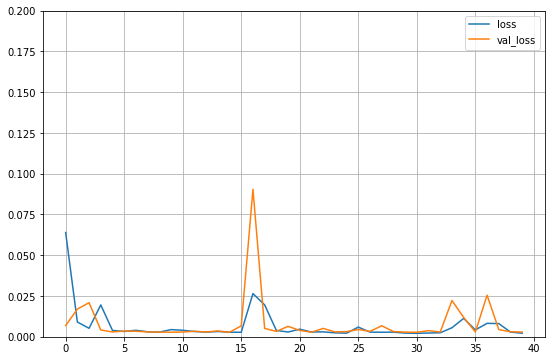

In [102]:
#학습결과 시각화
plt.figure(figsize = (9,6))
plt.ylim(0, 0.2)
plt.plot(History_FD.history['loss'])
plt.plot(History_FD.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

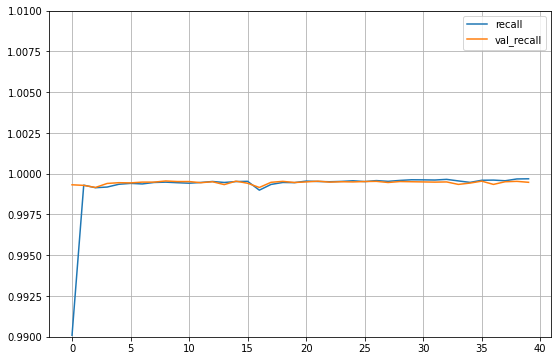

In [101]:
plt.figure(figsize = (9,6))
plt.ylim(0.99, 1.01)
plt.plot(History_FD.history['recall'])
plt.plot(History_FD.history['val_recall'])
plt.legend(['recall','val_recall'])
plt.grid()
plt.show()

In [89]:
# Predict + Validation
# 확률값 산출
np.set_printoptions(suppress = True, precision = 5)

Model_FD.predict(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [90]:
# y_hat(예측값)

y_hat = Model_FD.predict_classes(X_test)

y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
# y (실제값)

y = np.argmax(y_test, axis = 1)

y

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
#confusion matrix + classification report

confusion_matrix(y, y_hat)

array([[85277,    22],
       [   33,   111]])

In [93]:
print(classification_report(y, y_hat,
                            target_names = ['Normal(0)',
                                            'Fraud(1)']))

              precision    recall  f1-score   support

   Normal(0)       1.00      1.00      1.00     85299
    Fraud(1)       0.83      0.77      0.80       144

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443



본 내용은 2021/03/18(목)에 학습한 내용입니다.